In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
price = pd.read_csv('bitcoin.csv')

In [3]:
price_before_2021 = price[~(price['Date'] > '2020-12-25')]

In [4]:
trend = pd.read_csv('5yeargoogle.csv')

In [5]:
trend_before_2021 = trend[~(trend['Date'] > '2020-12-25')]

In [6]:
trend_before_2021

,Date,Interest
0,2016-02-14,2
1,2016-02-21,2
2,2016-02-28,2
3,2016-03-06,2
4,2016-03-13,2
...,...,...
249,2020-11-22,18
250,2020-11-29,17
251,2020-12-06,13
252,2020-12-13,22


In [7]:
merged_inner = pd.merge(left=trend, right=price)

In [8]:
price_interest = merged_inner.drop(['Date','Currency','Closing Price (USD)', '24h High (USD)', '24h Low (USD)'], axis=1)

In [9]:
price_interest.to_csv("price_interest.csv", index=False)

In [10]:
#price_interest['Interest'] = np.log(price_interest['Interest'])
price_interest['24h Open (USD)'] = np.log(price_interest['24h Open (USD)'])



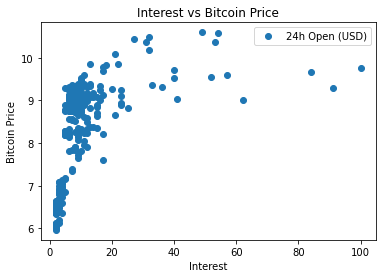

In [11]:
price_interest.plot(x='Interest', y='24h Open (USD)', style='o')
plt.title('Interest vs Bitcoin Price')
plt.xlabel('Interest')
plt.ylabel('Bitcoin Price')
plt.show()

In [12]:
X = price_interest.iloc[:, :-1].values
y = price_interest.iloc[:, 1].values
X

array([[  2],
       [  2],
       [  2],
       [  2],
       [  2],
       [  2],
       [  2],
       [  2],
       [  2],
       [  2],
       [  2],
       [  3],
       [  2],
       [  2],
       [  2],
       [  3],
       [  2],
       [  4],
       [  4],
       [  3],
       [  3],
       [  2],
       [  2],
       [  2],
       [  3],
       [  2],
       [  2],
       [  2],
       [  2],
       [  2],
       [  2],
       [  2],
       [  2],
       [  2],
       [  2],
       [  2],
       [  2],
       [  2],
       [  2],
       [  2],
       [  2],
       [  2],
       [  2],
       [  2],
       [  3],
       [  3],
       [  5],
       [  4],
       [  3],
       [  3],
       [  3],
       [  3],
       [  3],
       [  4],
       [  4],
       [  5],
       [  4],
       [  4],
       [  3],
       [  3],
       [  3],
       [  3],
       [  4],
       [  5],
       [  7],
       [  7],
       [ 17],
       [  9],
       [ 10],
       [ 11],
       [  8],
      

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
    from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = regressor.predict(X_test)

In [16]:
exp_y_test = np.exp(y_test)
exp_y_pred = np.exp(y_pred)
df = pd.DataFrame({'Actual': exp_y_test, 'Predicted': exp_y_pred})
df

,Actual,Predicted
0,26447.708072,11241.858010
1,6970.363750,4966.870248
2,9022.012126,3223.080819
3,9817.597500,3906.097022
4,6198.040366,3906.097022
5,3433.044895,3223.080819
6,415.751000,2659.496143
7,10450.949520,3223.080819
8,11279.875539,3722.845976
9,3788.289089,4300.103826
